<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Прогноз-продаж-в-интернет-магазине" data-toc-modified-id="Прогноз-продаж-в-интернет-магазине-1">Прогноз продаж в интернет-магазине</a></span></li><li><span><a href="#Ознакомление-с-данными" data-toc-modified-id="Ознакомление-с-данными-2">Ознакомление с данными</a></span></li><li><span><a href="#Предобработка--данных" data-toc-modified-id="Предобработка--данных-3">Предобработка  данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4">Исследовательский анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5">Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6">Общий вывод</a></span></li></ul></div>

# Прогноз продаж в интернет-магазине

В интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Данные предоставлены до 2016 года.

# Ознакомление с данными

*Импортируем библиотеки.*

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.options.display.float_format = '{:.2f}'.format

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt


import numpy as np

import warnings
warnings.simplefilter("ignore")

from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

*Изучим общую информацию.*

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


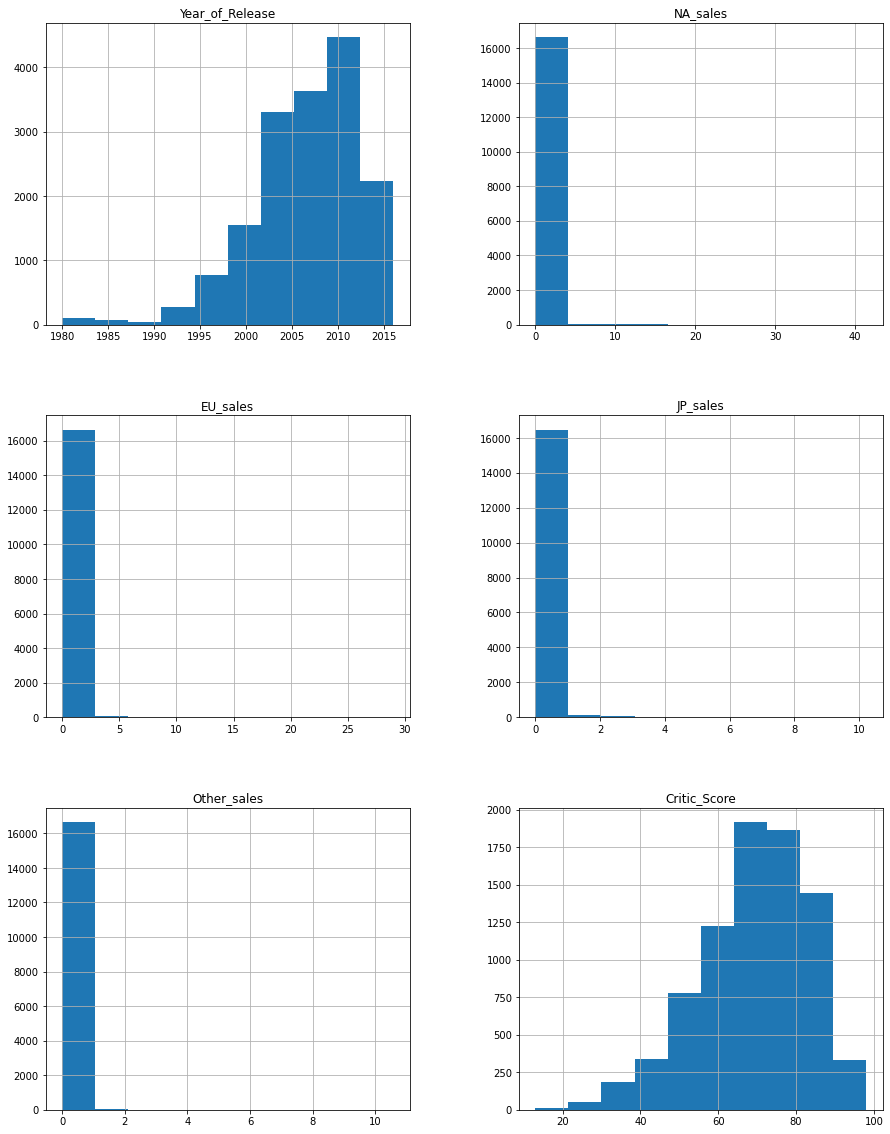

In [6]:
data.hist(figsize=(15, 20));

In [7]:
data.isna().mean()*100

Name               0.01
Platform           0.00
Year_of_Release    1.61
Genre              0.01
NA_sales           0.00
EU_sales           0.00
JP_sales           0.00
Other_sales        0.00
Critic_Score      51.32
User_Score        40.09
Rating            40.48
dtype: float64

**Вывод:** ознакомившись с общей информацией были обнаружены пропуски в столбцах "Name", "Year_of_Release", "Genre", "Critic_Score", "User_Score", "Rating". Также можно наблюдать некорректное написание названий столбцов.

# Предобработка  данных

*Проверим данные на наличие явных дубликатов.*

In [8]:
data.duplicated().sum()

0

*Приведём названия столбцов к нижнему регистру.*

In [9]:
data.columns = data.columns.str.lower()

*Преобразуем данные в нужные типы.*

In [10]:
data['year_of_release'] = pd.to_numeric(data['year_of_release'], errors='coerce').astype('Int64')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce').astype('float64')

Изменили тип данных в столбце 'year_of_release' в 'int64' т.к. все числа в столбце целые.

Изменили тип данных в столбце 'user_score' в 'float64' т.к. оценки пользователей могут быть дробными числом. Также заменим аббревиатуру 'tbd' пустым значением для дальнейшего анализа.

**Работа с пропусками.**

*Столбцы 'name', 'year_of_release', 'genre' имеют малое количество пропусков, удалим их.*

In [11]:
data = data.dropna(subset=['name','year_of_release','genre']).reset_index(drop=True)

*Заменим пропуски в столбце 'rating' заглушкой 'unknown value'.*

In [12]:
data['rating'] = data['rating'].fillna('unknown value')

*Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.*

In [13]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

**Вывод:**
- Преобразовали столбцы датафрейма к нижнему регистру.
- Обработали пропуски в столбцах 'name', 'year_of_release', 'genre', 'rating'.
- Возможной причиной появления пропусков в 'name' может являться невозможность перевести на английский язык название игры.
- Возможной причиной появления пропусков в 'year_of_release' может являться переиздание игры с более старых платформ не представленных в выборке данных.
- Возможной причиной появления пропусков в 'genre' может являться очень редкий вид жанра.
- В интернете мы можем найти информацию, что рейтинг ESRB применяется для определения возрастного рейтинга в США и Канаде.Из-за того, что игры выпускаются для разных стран возникли пропуски.По этой причине мы заполнили пропуски в 'rating' "заглушкой" 'unknown value'.
- Заменить пропуски медианным значением или другими в 'critic_score' и 'user_score' не представляется возможным так как это может повлечь искажение данных, что может привести к ошибочным показателям при дальнейшем анализе.
- Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец 'total_sales'.
- Преобразовали столбцы 'year_of_release' и 'user_score' к нужным типам данных.*
- В сети мы можем найти информацию, что TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Следовательно для дальнейшего анализа было принято решение заменить строчное значение 'tbd' на Nan.

# Исследовательский анализ данных

*Рассмотрим, сколько игр выпускалось в разные годы.*

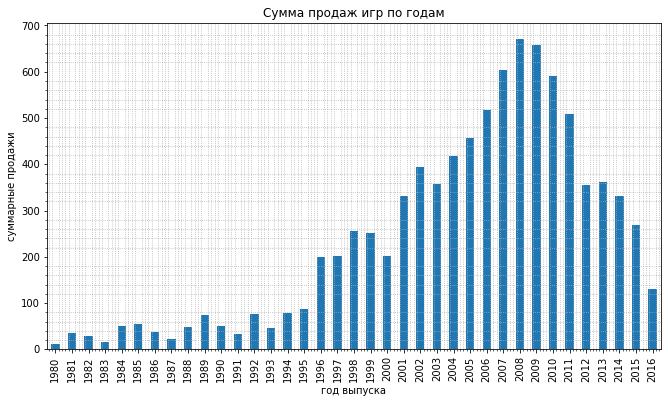

In [14]:
data.pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc='sum') \
                .plot.bar(figsize=(11, 6), legend=False)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.title('Сумма продаж игр по годам')
plt.xlabel('год выпуска')
plt.ylabel('суммарные продажи')

plt.show();

На графике мы можем наблюдать, что в 1996 году было двукратное увеличение количества продаж видеоигр в сравнении с 1995 и стремительный рост вплоть до 2008 года. После 2008 года мы можем наблюдать снижение количества продаваемых видеоигр. Причиной снижения продаж после 2008 года может являеться мировой экономический кризис.

*Рассмотрим как менялись продажи игр на разных платформах.*

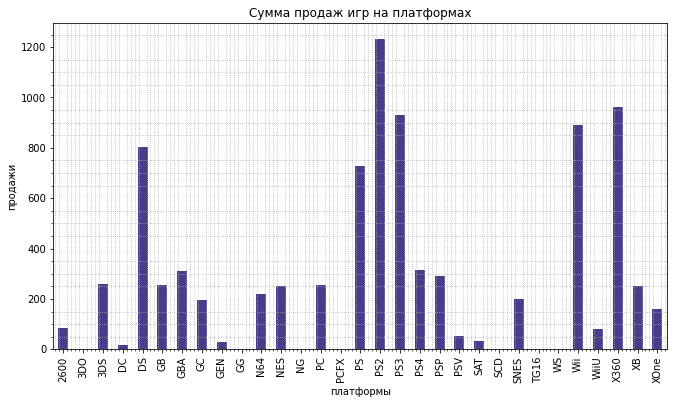

In [15]:
data.pivot_table(index=['platform'], values=['total_sales'], aggfunc='sum').plot \
                .bar(color='darkslateblue', figsize=(11, 6), legend=False)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.title('Cумма продаж игр на платформах')
plt.xlabel('платформы')
plt.ylabel('продажи')

plt.show();

На графике мы можем наблюдать 6 наиболее популярных консолей по продажам игр, а именно: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'.

*Рассмотрим распределение продаж на шести лидирующих платформах по годам.*

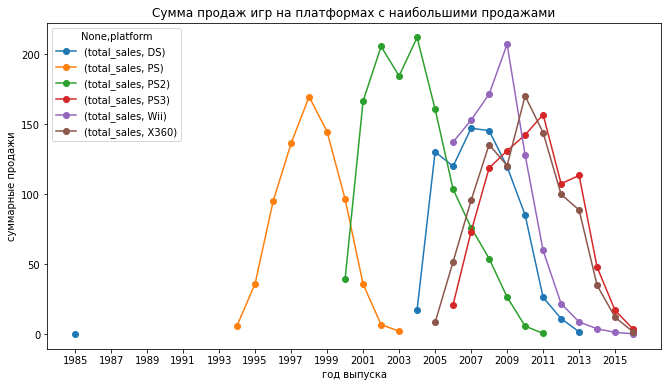

In [16]:
platforms_6 = data.query('((platform == "DS") or (platform == "PS") or (platform == "PS2") or \
                          (platform == "PS3") or (platform == "Wii") or (platform == "X360"))')

platforms_6.pivot_table(index='year_of_release', columns='platform', values=['total_sales'], aggfunc='sum').plot(figsize=(11, 6), style='o-')
plt.xticks(np.arange(1985,2016,2))
plt.title('Cумма продаж игр на платформах с наибольшими продажами')
plt.xlabel('год выпуска')
plt.ylabel('суммарные продажи')

plt.show();

На графике мы может наблюдать, что в промежутке с 1994 до 2000 года лидирует 'PS'. В 2000 году появляется "PS2" и через год повторяет успехи 'PS1'. PS2 является лидером продаж до 2005 года. С 2006 года мы можем видеть начало конкуренции между 'DS','Wii','PS3' и 'X360'. В среднем платформы существуют около 10 лет. Основные продажи игр на платформе составляют 3-4 года.

*Поскольку основные продажи составляют 3-4 года, возьмёт период для дальнейшего исследования 4 года.*

In [17]:
correct_years = data[data['year_of_release'] >= 2013]

*Рассмотрим продажи игр на разных платформах и выберем несколько потенциально прибыльных.*

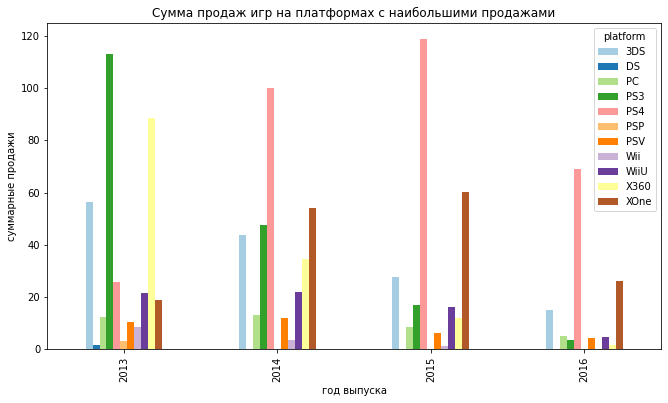

In [18]:
correct_years.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') \
                         .plot.bar(figsize=(11, 6), colormap='Paired')
plt.title('Cумма продаж игр на платформах с наибольшими продажами')
plt.xlabel('год выпуска')
plt.ylabel('суммарные продажи')

plt.show();

В 2013 году мы можем наблюдать 3 самых популярных платформы : 'PS3', 'X360' '3DS'.

В 2014 начинает на рынке лидирует 'PS4', также стремительно растёт спрос на 'XOne'. На платформах 'PS3', '3DS', 'X360' наблюдается спад продаж.

В 2015 'PS4' закрепляет своё лидерство, у 'XOne' едва ощутимый прирост. Остальные значительно отстают от основных лидеров.

В 2016 всё также остаётся лидером 'PS4' как и в прошлом году второе место по востребованности занимает 'XOne'. Но при этом продажи на всех платформах значительно снизились.

In [19]:
correct_years.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


*Построим график «ящик с усами» по глобальным продажам игр с разбивкой по платформам.*

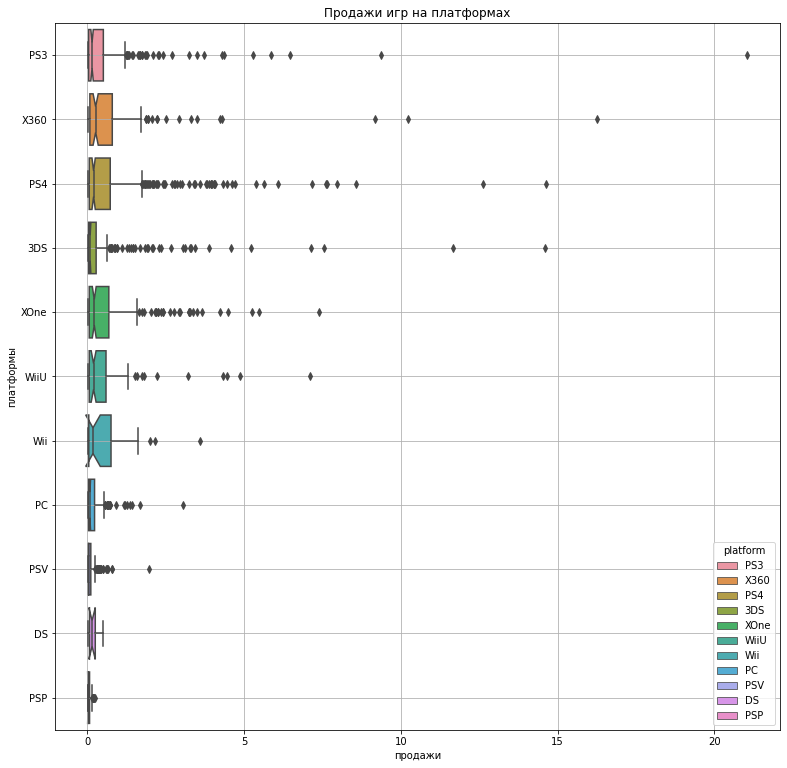

In [20]:
plt.figure(figsize=(13, 13))
ax = sns.boxplot(data=correct_years, x='total_sales', y='platform', hue='platform', notch=True, dodge=False)
plt.grid(True)
ax.set(xlabel='продажи', ylabel='платформы', title='Продажи игр на платформах')

plt.show()

На диаграмме большое количество выбросов. Ограничим лимит продаж в диапозоне от 0 до 1.75.

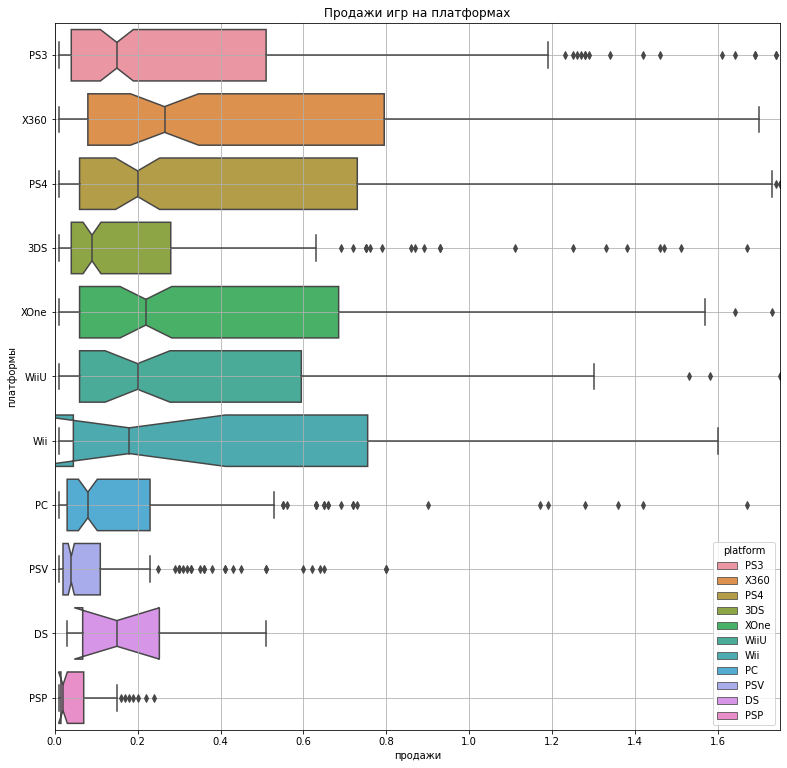

In [21]:
plt.figure(figsize=(13, 13))
ax = sns.boxplot(data=correct_years, x='total_sales', y='platform', hue='platform', notch=True, dodge=False)
plt.grid(True)
plt.xlim(0,1.75);
ax.set(xlabel='продажи', ylabel='платформы', title='Продажи игр на платформах')

plt.show()

In [22]:
correct_years.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.00,0.47,1.38,0.01,0.04,0.09,0.28,14.60
DS,8.00,0.19,0.17,0.03,0.07,0.15,0.25,0.51
PC,189.00,0.21,0.35,0.01,0.03,0.08,0.23,3.05
PS3,345.00,0.53,1.45,0.01,0.04,0.15,0.51,21.05
PS4,392.00,0.80,1.61,0.01,0.06,0.20,0.73,14.63
PSP,67.00,0.05,0.06,0.01,0.01,0.02,0.07,0.24
PSV,358.00,0.09,0.15,0.01,0.02,0.04,0.11,1.96
Wii,23.00,0.59,0.92,0.01,0.04,0.18,0.76,3.58
WiiU,115.00,0.56,1.04,0.01,0.06,0.20,0.60,7.09


Глядя на график мы можем обнаружить самыми востребованными по медиане 'X360', 'PS4', 'XOne', 'WiiU'. И эти же платформы имеют высокие границы. Из этого можно сделать вывод, что у наших платформ, в отличии от тех, которые не попали в выборку есть значительно больше игр, которые покупались намного чаще. Также мы можем наблюдать выбросы на всех платформах кроме DS. Наибольшее количество выбросов у PS3, PS4, 3DS, XOne. Причиной выбросов могут являться эксклюзивные или какие-то популярные игры для платфомы. Например, на 3DS маленький ящик и много выбросов, это говорит о том, что большая часть объема продаж делается за счет этих выбросов. В то же время у XOne ситуация иная: большой бокс, длинный ус и мало выбросов. Это свидетельствует о том, что на XOne покупают самые разные игры, причем, в немалом количестве.

**Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

Построим диаграмму рассеяния с оценками среди пользователей для платформы 'PS4', так как она имеет самый большой объем продаж.

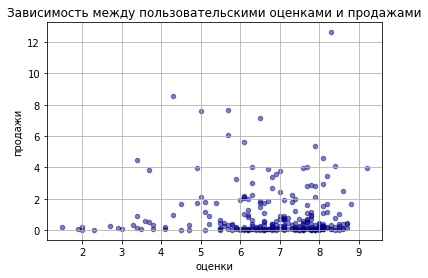

In [23]:
PS4 = correct_years[correct_years['platform']=='PS4']

PS4.plot(kind='scatter', x='user_score', y='total_sales', color='darkblue', alpha=0.5)
plt.grid(True)
plt.title('Зависимость между пользовательскими оценками и продажами')
plt.xlabel('оценки')
plt.ylabel('продажи')

plt.show();

Построим диаграмму рассеяния для 'PS4' с оценками критиков.

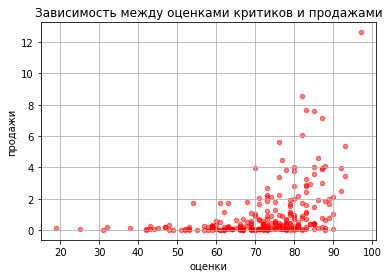

In [24]:
PS4.plot(x='critic_score', y='total_sales', kind='scatter', color='red', alpha=0.5)
plt.grid(True)
plt.title('Зависимость между оценками критиков и продажами')
plt.xlabel('оценки')
plt.ylabel('продажи')

plt.show();

Создадим таблицу с корреляцией по этим параметрам.

In [25]:
PS4 = correct_years[correct_years['platform']=='PS4']
PS4 = PS4.loc[:, ['platform', 'critic_score','user_score', 'total_sales']]
PS4_cor = PS4.groupby('platform').corr()
PS4_cor.loc[:, ['total_sales']]

total_sales
platform                          
PS4      critic_score         0.41
         user_score          -0.03
         total_sales          1.00

Исходя из данных, представленных на диаграммах расмаха и значений корреляции можно отметить, что имеется слабая зависимость между оценкой критиков и продажами . Зависимость составляет около 0.41.

зависимость между продажами и оценками пользователей отсутствует и равна -0.03.

*Соотнесём выводы с продажами игр на других платформах.*

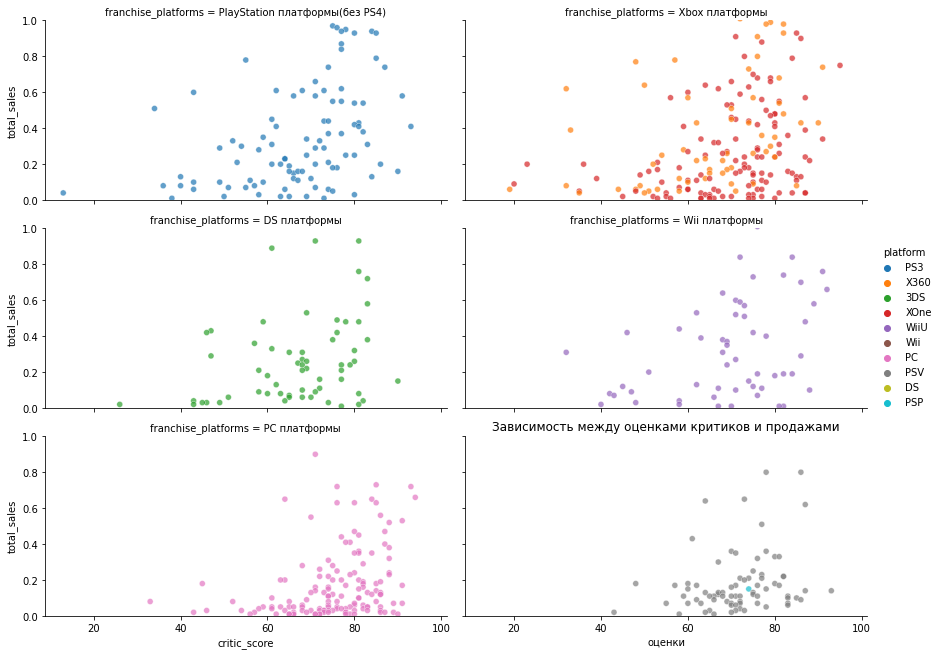

In [26]:
another = correct_years[correct_years['platform']!='PS4']
def platform_type(row):
    try:
        if 'X360' in row or 'XOne' in row:
            return 'Xbox платформы'
        elif 'DS' in row:
            return 'DS платформы'
        elif 'Wii' in row:
            return 'Wii платформы'
        elif 'PS3' in row:
            return 'PlayStation платформы(без PS4)'
        elif 'PC' in row:
            return 'PC платформы' 
        else:
            return 'другие платформы'
    except:
        return 'ошибка категории'

another['franchise_platforms'] = another['platform'].apply(platform_type)

sns.relplot(data=another, x='critic_score',y='total_sales',height=3, aspect=2,kind='scatter',hue='platform',\
            col='franchise_platforms', col_wrap=2, alpha=0.7)
plt.ylim(0,1)
plt.title('Зависимость между оценками критиков и продажами')
plt.xlabel('оценки')
plt.ylabel('продажи')

plt.show();

In [27]:
another = another.loc[:, ['franchise_platforms', 'critic_score','user_score', 'total_sales']]
another_с = another.groupby(['franchise_platforms']).corr()
another_с.loc[:, ['total_sales']]

total_sales
franchise_platforms                                     
DS платформы                   critic_score         0.36
                               user_score           0.24
                               total_sales          1.00
PC платформы                   critic_score         0.20
                               user_score          -0.09
                               total_sales          1.00
PlayStation платформы(без PS4) critic_score         0.33
                               user_score           0.00
                               total_sales          1.00
Wii платформы                  critic_score         0.38
                               user_score           0.35
                               total_sales          1.00
Xbox платформы                 critic_score         0.35
                               user_score          -0.04
                               total_sales          1.00
другие платформы               critic_score         0.25
                               user_score          -0.00
                               total_sales          1.00

Рассмотрим корреляцию платформ по отношению к оценке пользователей:
- DS = 0.24(очень слабая корреляция)
- PC = -0.09(отсутствует корреляция)
- PS4 = 0.00(отсутствует корреляция)
- Wii = 0.35(слабая корреляция)
- Xbox = -0.04(очень слабая корреляция)
- другие платформы = -0.00(отсутствует корреляция)

Рассмотрим корреляцию платформ по отношению к оценке критиков:
- DS = 0.36(слабая корреляция)
- PC = 0.20(очень слабая корреляция)
- PS4 = 0.33(слабая корреляция)
- Wii = 0.38(слабая корреляция)
- Xbox = 0.35(слабая корреляция)
- другие платформы = 0.25(очень слабая корреляция)

**Рассмотрим общее распределение игр по жанрам.**

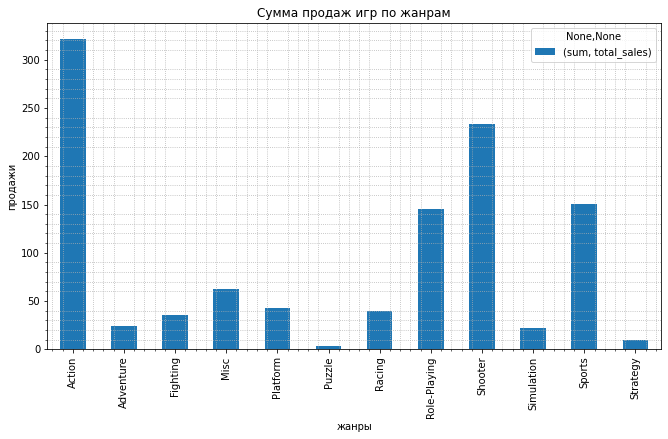

In [28]:
correct_years.pivot_table(index='genre', values='total_sales', aggfunc=['sum']).plot.bar(figsize=(11, 6))
plt.minorticks_on()
plt.grid(which='minor', linestyle=':')
plt.title('Cумма продаж игр по жанрам')
plt.xlabel('жанры')
plt.ylabel('продажи')

plt.show();

Наибольшие продажи приходятся на Action, Shooter, Sports, Role-Playing.

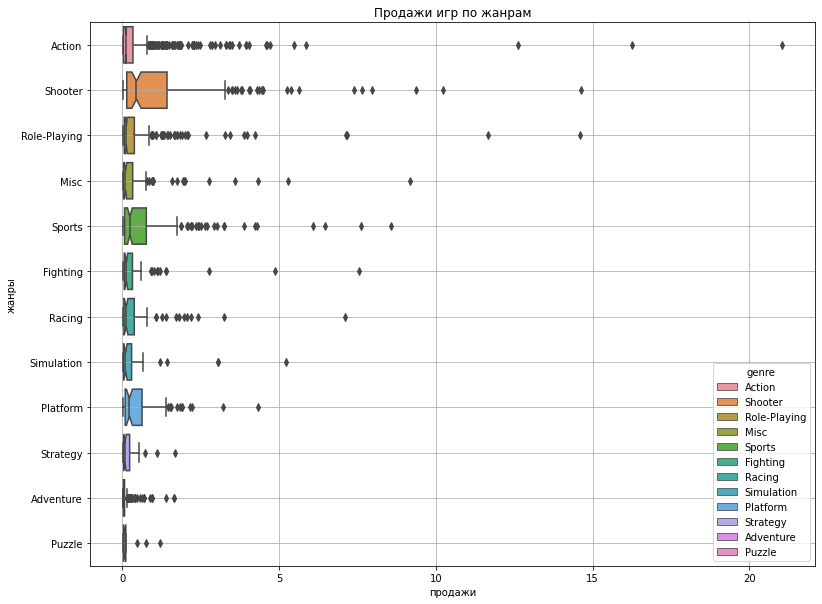

In [29]:
plt.figure(figsize=(13, 10))
ax = sns.boxplot(data=correct_years, x='total_sales', y='genre', hue='genre', notch=True, dodge=False)
plt.grid(True)
ax.set(xlabel='продажи',
       ylabel='жанры',
       title='Продажи игр по жанрам')

plt.show()

На диаграмме большое количество выбросов. Ограничим лимит продаж в диапозоне от 0 до 3.3.

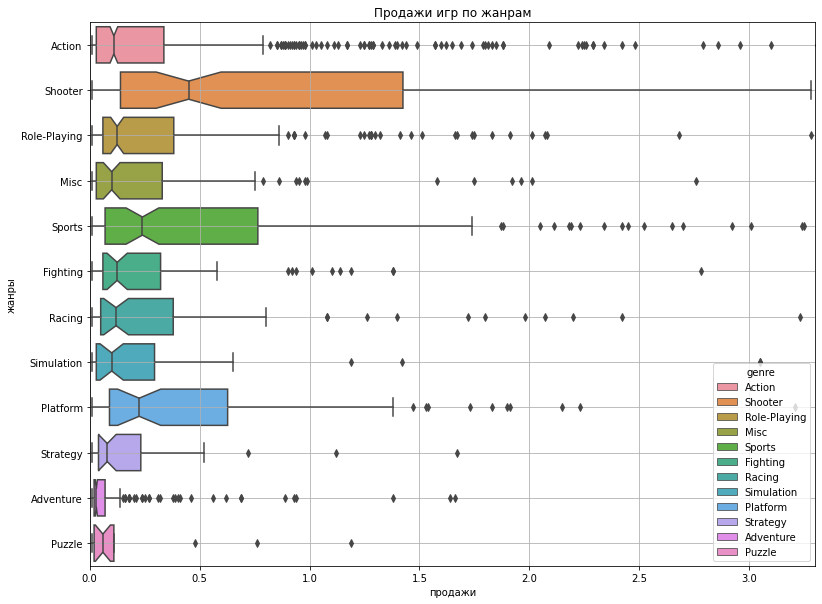

In [30]:
plt.figure(figsize=(13, 10))
ax = sns.boxplot(data=correct_years, x='total_sales', y='genre', hue='genre', notch=True, dodge=False)
plt.grid(True)
plt.xlim(0,3.3);
ax.set(xlabel='продажи',
       ylabel='жанры',
       title='Продажи игр по жанрам')

plt.show()

Большее количество проданных игр у жанров "Shoter", "Sports", "Platform". На диаграмме общей суммы продаж жанр "Action" был первым,но если смотреть на распределение и медиану, то можно увидеть, что у этого жанра очень много игр, которые мало покупают.

**Вывод по исследовательскому анализу данных:**

- Рассмотрели период выпуска игр с 1996 по 2016 год и пришли к выводу, что причиной снижения количества видеоигр после 2008 года скорее всего является мировой экономический кризис.

- Исследовали как менялись продажи по платформам и отобрали для анализа самые продоваемые, ими оказались:'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'.
- Чтобы построить прогноз на 2017 год было принято решение взять период 4 года для дальнейшего анализа.

- Выяснили какие платформы лидируют по продажам, растут или падают.Самыми перспективными платформами являются PS4, XOne.Платформами которые теряют лидирующие поиции оказались 3DS,PS3,X360

- Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам и определили  самыми востребованными 'X360','PS4', 'XOne', 'WiiU'.

- Построили диаграмму рассеяния для 'PS4' с оценками среди пользователей и критиков.В ходе исследования определили ,что имеется слабая зависимость между оценкой критиков и продажами, зависимость составляет около 0.41.Зависимость между продажами и оценками пользователей отсутствует и равна -0.03.

**Определили корреляцию платформ по отношению к оценке пользователей:**

- DS = 0.24(очень слабая корреляция)
- PC = -0.09(отсутствует корреляция)
- PS4 = 0.00(отсутствует корреляция)
- Wii = 0.35(слабая корреляция)
- Xbox = -0.04(очень слабая корреляция)
- другие платформы = -0.00(отсутствует корреляция)
- корреляция платформ по отношению к оценке критиков:
- DS = 0.36(слабая корреляция)
- PC = 0.20(очень слабая корреляция)
- PS4 = 0.33(слабая корреляция)
- Wii = 0.38(слабая корреляция)
- Xbox = 0.35(слабая корреляция)
- другие платформы = 0.25(очень слабая корреляция)


Рассмотрели общее распределение игр по жанрам и выяснили, что наибольшие продажи приходятся на Shoter, Sports, Platform.На диаграмме же мы наблюдали лидерство за Action.Из этого мы можем сделать вывод,что люди покупают видеоигры в жанре Action значительно реже в сравнении Shoter, Sports, Platform.Причиной этого может являться интерес к определённым видеоиграм,а не к жанру.

**Составим портрет пользователя каждого региона.**

*Самые популярные платформы (топ-5) для пользователей Северной Америки.*

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20
5,other,52.49


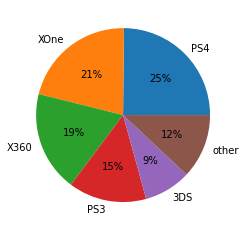

In [31]:
na_platforms = correct_years.pivot_table(index=['platform'], values=['na_sales'], aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False).reset_index(drop=True)
na_platforms = na_platforms.append([{'platform':'other', 'na_sales':sum(na_platforms['na_sales'].iloc[5:])}], ignore_index=True).iloc[[0,1,2,3,4,-1]].reset_index(drop=True)
display(na_platforms)


plt.pie(na_platforms['na_sales'], labels=na_platforms['platform'], autopct='%.0f%%');

В Северноей Америке одинаковой популярностью  полюзуются приставки Microsoft(40%) и Sony(40%). PS4(25%), PS3(15%), XOne(21%), X360(19), 3DS(9%), other(12%).

Самые популярные платформы (топ-5) для пользователей Европы.

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96
5,other,58.26


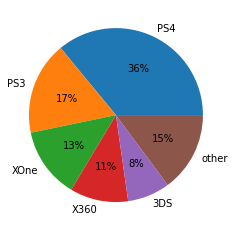

In [32]:
eu_platforms = correct_years.pivot_table(index=['platform'], values=['eu_sales'], aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False).reset_index(drop=True)
eu_platforms = eu_platforms.append([{'platform':'other', 'eu_sales':sum(eu_platforms['eu_sales'].iloc[5:])}], ignore_index=True).iloc[[0,1,2,3,4,-1]].reset_index(drop=True)
display(eu_platforms)


plt.pie(eu_platforms['eu_sales'], labels=eu_platforms['platform'], autopct='%.0f%%');

В Европе потребитель чаще отдаёт предпочтение консоли от Sony(53%). Наибольшей популярностью пользуется PS4(36%). 
PS3(17%), XOne(13%), X360(11), 3DS(8%), other(15%)

Самые популярные платформы (топ-5) для пользователей Японии.

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88
5,other,4.19


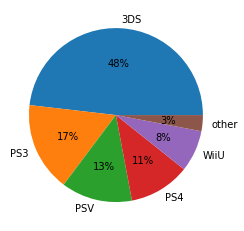

In [33]:
jp_platforms = correct_years.pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum') \
                .reset_index().sort_values(by='jp_sales', ascending=False).reset_index(drop=True)
jp_platforms = jp_platforms.append([{'platform':'other', 'jp_sales':sum(jp_platforms['jp_sales'] \
                     .iloc[5:])}], ignore_index=True).iloc[[0,1,2,3,4,-1]].reset_index(drop=True)
display(jp_platforms)


plt.pie(jp_platforms['jp_sales'], labels=jp_platforms['platform'], autopct='%.0f%%');

97% платформ являются японскими. Похоже, что японцы больше любят портативные консоли и родной рынок.

*Самые популярные жанры (топ-5) для пользователей Северной Америки*

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49
5,other,62.76


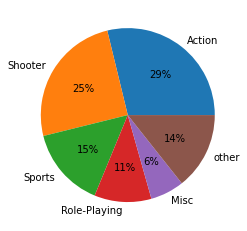

In [34]:
na_genres= correct_years.pivot_table(index=['genre'], values=['na_sales'], aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False).reset_index(drop=True)
na_genres = na_genres.append([{'genre':'other', 'na_sales':sum(na_genres['na_sales'].iloc[5:])}], ignore_index=True).iloc[[0,1,2,3,4,-1]].reset_index(drop=True)
display(na_genres)


plt.pie(na_genres['na_sales'], labels=na_genres['genre'], autopct='%.0f%%');

В Северноей Америке наибольшей популярностью пользуются Action(29%) и Shooter(25%) и суммарно занимают 54% рынка. Оставшуюся часть занимают жанры: Sports(15%), Role-Playing(11%), Misc(6%) и все остальные объединённые в общую группу(14%).

*Самые популярные жанры (топ-5) для пользователей Европы.*

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19
5,other,68.56


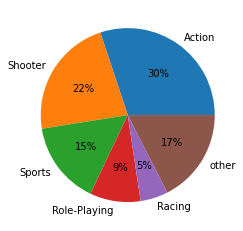

In [35]:
eu_genres = correct_years.pivot_table(index=['genre'], values=['eu_sales'], aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False).reset_index(drop=True)
eu_genres = eu_genres.append([{'genre':'other', 'eu_sales':sum(eu_genres['eu_sales'].iloc[5:])}], ignore_index=True).iloc[[0,1,2,3,4,-1]].reset_index(drop=True)
display(eu_genres)


plt.pie(eu_genres['eu_sales'], labels=eu_genres['genre'], autopct='%.0f%%');

В Европе показатели очень схожи с Северной Америкой: Action(30%), Shooter(22%), Sports(15%), Role-Playing(9%), другие жанры(17%). Отличием является появление на диаграмме жанра Racing(5%) на месте Misc.

*Самые популярные жанры (топ-5) для пользователей Японии*

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61
5,other,25.79


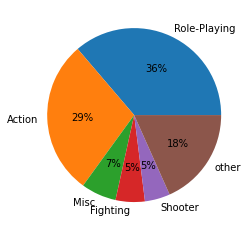

In [36]:
jp_genres = correct_years.pivot_table(index=['genre'], values=['jp_sales'], aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False).reset_index(drop=True)
jp_genres = jp_genres.append([{'genre':'other', 'jp_sales':sum(jp_genres['jp_sales'].iloc[5:])}], ignore_index=True).iloc[[0,1,2,3,4,-1]].reset_index(drop=True)
display(jp_genres)


plt.pie(jp_genres['jp_sales'], labels=jp_genres['genre'], autopct='%.0f%%');

В Японии заметны сущетвенные изменения предпочтения жанров в сравнении с Северной Америкой и Европой. Наибольшей популярностью пользуются Role-Playing(36%). Заинтересованность  в жанре Action(29%) сопоставима с другими регионами. Shooter имеет всего 5%, что значинельно ниже Северной Америки(25%) и Европы(22%).  Misc(7%),Fighting(5%), все остальные жанры(18%).

**Рассмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе**

Построим диаграмму распределения объема продаж игр по рейтингу ESRB в Северной Америке. 

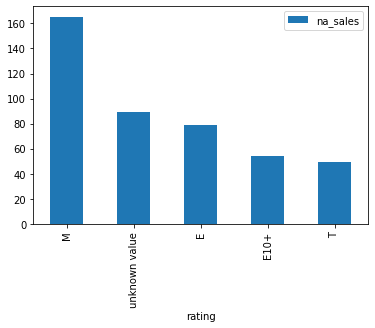

In [37]:
rating_na = correct_years.pivot_table(index='rating', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False).reset_index(drop=True)
rating_na.plot.bar('rating', 'na_sales');

Построим диаграмму распределения объема продаж игр по рейтингу ESRB в Европе. 

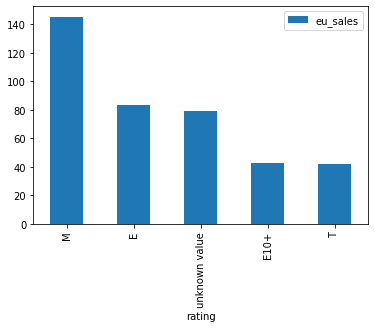

In [38]:
rating_eu = correct_years.pivot_table(index='rating', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False).reset_index(drop=True)
rating_eu.plot.bar('rating', 'eu_sales');

Построим диаграмму распределения объема продаж игр по рейтингу ESRB в Японии. 

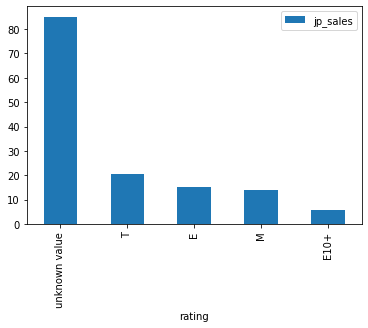

In [39]:
rating_jp = correct_years.pivot_table(index='rating', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False).reset_index(drop=True)
rating_jp.plot.bar('rating', 'jp_sales');

Показатели диаграмм в Северной Америке и Европе очень схожи между собой. Япония снова отличилась. Скорее всего, дело тут в том, что ESRB работает только на территории Северной Америки, в Японии есть аналогичная организация: CERO. Я думаю, что, с одной стороны, иностранным играм они (ESRB) не присваивают рейтинги, поскольку на них уже есть маркировка. Чтобы не было конфликта. Так что вполне возможно, что часть игр это продукция Японии или же это корейские игры (там тоже своя организация). С другой стороны, раз они продают игры на своем рынке, то присвоение рейтинга может быть обязательным. Значит, дело еще может быть в том, что наша таблица это склейка двух таблиц: продажи на Западе и на Востоке. Так или иначе, это очень показательный пример. И именно разница в рынках (восточный и западный) наталкивает на мысль о неслучайности пропусков

**Вывод:**

- Исследовали топ-5 самых популярных платформ в Северной Америке и выяснили, что платформы Microsoft(40%) и Sony(40%) являются самыми популярными.
- Исследовали топ-5 самых популярных платформ в Европы и выяснили, что  потребитель чаще отдаёт предпочтение консоли от Sony(53%).Наибольшей популярностью пользуется PS4(36%).
- Исследовали топ-5 самых популярных платформ в Японии и выяснили, что 97% платформ являются японскими.Лидерство за 3DS(48%).
- Исследовали топ-5 самых популярных жанров в Северной Америке и выяснили, что в Северной Америке наибольшей популярностью пользуются Action(29%) и Shooter(25%) и суммарно занимают 54% рынка. Оставшуюся часть занимают жанры: Sports(15%), Role-Playing(11%), Misc(6%) и все остальные объединённые в общую группу(14%)
- Исследовали топ-5 самых популярных жанров в Европе и выяснили, что там практически аналогичные показатели : Action(30%), Shooter(22%), Sports(15%), Role-Playing(9%), другие жанры(17%). Отличием является появление на диаграмме жанра Racing(5%) на месте Misc.
- Исследовали топ-5 самых популярных жанров в Японии и выяснили, что наибольшей популярностью пользуются Role-Playing(36%).Заинтересованность  в жанре Action сопоставима с другими регионами.Shooter имеет всего 5%.
- Исследовали показатели диаграмм в Северной  Америке и Европе и выяснили, что они очень похожи.В Северной Америке чаще продаются видеоигры с рейтингом М, E10+ и T. В Европе чаще продаются видеоигры с рейтингом E. В Японии уже совершенно другие показатели, все вышеперечисленные категории продаются реже.Наибольшую долю рынка занимает видео игры с неизвестным рейтингом ESRB.

# Проверка гипотез

*Формулировка гипотез.*

Первая гипотеза:

    - нулевая гипотеза: Средние пользовательские рейтинги платформы Xbox One равны рейтингам платформы PC.
    - альтернативная гипотеза: Средние пользовательские рейтинги платформы Xbox One не равны рейтингам платформы PC.

Вторая гипотеза:

    - нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) равны рейтингам жанра Sports (англ. «спортивные соревнования»).
    - альтернативная гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) не равны рейтингам жанра Sports (англ. «спортивные соревнования»).

зададим параметр alpha = 0.05(стандартное значение для не большой, но достаточной для анализа выборки)

гипотезы проверим методом scipy.stats.ttest_ind (array1, array2, equal_var).

Необходимые для проверки гипотезы подходят под критерий равенства средних двух генеральных совокупностей. Так как рейтинги платформ и рейтинги жанров могут быть либо одинаковыми, т.е. равны, либо разными, т.е не равны.

В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var).
У метода несколько параметров:
array1, array2 — массивы, содержащие выборки;
equal_var (от англ. equal variance — «равная дисперсия») — необязательный параметр, задающий, считать ли равными дисперсии выборок. Передаётся как equal_var = True или equal_var = False (True — считать, False — не считать).

параметр equal_var в нашей проверке необходимо принять как False, так как выборки не равны.

In [40]:
XONE = correct_years.query('platform == "XOne"')
XONE = XONE.loc[~(XONE['user_score'].isna()), 'user_score']

PC = correct_years.query('platform == "PC"')
PC = PC.loc[~(PC['user_score'].isna()), 'user_score']

results = st.ttest_ind(XONE, PC, equal_var=False)
alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


In [41]:
action = correct_years.query('genre == "Action"')
action = action.loc[~(action['user_score'].isna()), 'user_score']

sports = correct_years.query('genre == "Sports"')
sports = sports.loc[~(sports['user_score'].isna()), 'user_score']

results = st.ttest_ind(action, sports, equal_var=False)
alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704315e-20
Отвергаем нулевую гипотезу


Выведем среднее значение пользовательских рейтингов по платформам и по жанрам.

In [42]:
display('Среднее пользовательских рейтингов платформы XOne', XONE.mean())
display('Среднее пользовательских рейтингов платформы PC', PC.mean())
display('Среднее пользовательских рейтингов жанра Action', action.mean())
display('Среднее пользовательских рейтингов жанра Sports', sports.mean())

'Среднее пользовательских рейтингов платформы XOne'

6.521428571428572

'Среднее пользовательских рейтингов платформы PC'

6.2696774193548395

'Среднее пользовательских рейтингов жанра Action'

6.837532133676092

'Среднее пользовательских рейтингов жанра Sports'

5.238124999999999

**Вывод:**

- Результат использования метода  scipy.stats.ttest_ind () говорит о том, что нулевую гипотезу  о равенстве средних пользовательских рейтингов платформ  Xbox One и PC подтверждаем .

- Результат использования метода  scipy.stats.ttest_ind () говорит о том, что нулевую гипотезу гипотезу о равенстве средник пользовательских рейтингов жанров Action и Sports отвергаем.

# Общий вывод

**При ознакомлении с данными были  обнаружены пропуски в столбцах "Name", "Year_of_Release", "Genre", "Critic_Score", "User_Score", "Rating". А также замечено некорректное написание названий столбцов.**

**Во время предобработки данных были преобразованы названия столбцов к нижнему регистру. Обработаны пропуски в столбцах "Name", "Year_of_Release", "Genre", "Rating'.Посчитаны суммарные продажи во всех регионах и записаны в новый столбец "total_sales". Преобразовованы столбцы 'year_of_release' и 'user_score' к нужным типам данных.**

**В ходе исследовательского анализа данных были выполнены следующие действия:**

- Рассмотрели период выпуска игр с 1996 по 2016 год и пришли к выводу, что Причиной снижения количества видеоигр после 2008 года скорее всего является мировой экономический кризис.

- Исследовали как менялись продажи на разных платформах и отобрали для анализа самые продоваемые, ими оказались:'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'. Чтобы построить прогноз на 2017 год было принято решение взять период 4 года для дальнейшего анализа.

- Выяснили какие платформы лидируют по продажам, растут или падают.Самыми перспективными платформами являются PS4, XOne. Платформами которые теряют лидирующие поиции оказались 3DS,PS3,X360.

- Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам и определили самыми востребованными 'X360','PS4', 'XOne', 'WiiU'.
 
- Построили диаграмму рассеяния для 'PS4' с оценками среди пользователей и критиков. В ходе исследования определили ,что имеется слабая зависимость между оценкой критиков и продажами, зависимость составляет около 0.41.Зависимость между продажами и оценками пользователей отсутствует и равна -0.03.

**Определили корреляцию платформ по отношению к оценке пользователей:**

- DS = 0.24(очень слабая корреляция)
- PC = -0.09(отсутствует корреляция)
- PS4 = 0.00(отсутствует корреляция)
- Wii = 0.35(слабая корреляция)
- Xbox = -0.04(очень слабая корреляция)
- другие платформы = -0.00(отсутствует корреляция)

**Определили корреляцию платформ по отношению к оценке критиков:**

- DS = 0.36(слабая корреляция)
- PC = 0.20(очень слабая корреляция)
- PS4 = 0.33(слабая корреляция)
- Wii = 0.38(слабая корреляция)
- Xbox = 0.35(слабая корреляция)
- другие платформы = 0.25(очень слабая корреляция)
    
**Рассмотрели общее распределение игр по жанрам и выяснили,что наибольшие количество проданных игр у жанров "Shoter", "Sports", "Platform". На диаграмме общей суммы продаж жанр "Action" был первым,но если смотреть на распределение и медиану, то можно увидеть, что у этого жанра очень много игр, которые мало покупают.**

**Составили портрет пользователя каждого региона:**

- Исследовали топ-5 самых популярных платформ **в Северной Америке** и выяснили, что платформы Microsoft(40%) и Sony(40%) являются самыми популярными.

- Исследовали топ-5 самых популярных платформ в **Европе** и выяснили, что потребитель чаще отдаёт предпочтение консоли от Sony(53%). Наибольшей популярностью пользуется PS4(36%).

- Исследовали топ-5 самых популярных платформ в **Японии** и выяснили, что 97% платформ являются японскими. Лидерство за 3DS(48%).

- Исследовали топ-5 самых популярных жанров в **Северной Америке** и выяснили, что в Северной Америке наибольшей популярностью пользуются Action(29%) и Shooter(25%) и суммарно занимают 54% рынка. Оставшуюся часть занимают жанры: Sports(15%), Role-Playing(11%), Misc(6%) и все остальные объединённые в общую группу(14%)

- Исследовали топ-5 самых популярных жанров в **Европе** и выяснили, что там практически аналогичные показатели с **Северной Америкой**: Action(30%), Shooter(22%), Sports(15%), Role-Playing(9%), другие жанры(17%). Отличием является появление на диаграмме жанра Racing(5%) на месте Misc.

- Исследовали топ-5 самых популярных жанров в **Японии** и выяснили, что наибольшей популярностью пользуются Role-Playing(36%). Заинтересованность в жанре Action сопоставима с другими регионами. Shooter имеет всего 5%, что существенно ниже чем в **Северной Америке** и **Европе**.

- Исследовали показатели диаграмм по рейтингу в **Северной Америке** и **Европе** и выяснили, что они очень схожи между собой. В **Северной Америке** чаще продаются видеоигры с рейтингом М, E10+ и T. В **Европе** чаще продаются видеоигры с рейтингом E. В **Японии** уже совершенно другие показатели, все вышеперечисленные категории продаются реже. Наибольшую долю рынка занимает видео игры с неизвестным рейтингом ESRB.

**Были проверены 2 гипотезы:**
- 1-ая: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
- 2-я: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

В результате использования специального метода для проверки гипотезы о равенстве среднего двух генеральных совокупностей по выборкам: гипотезу о равенстве средних пользовательский рейтингов по платформам XOne и PC удалось подтвердить. Ггипотеза о равенстве средних пользовательских рейтингах жанров Action и Sports была отвергнута.